# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


---
---
---
---
---

<a id='intro'></a>
# Introduction
---
>This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. (original source on [Kaggle])

---

>### Data Dictionary :

>1. **PatientId** : Identification of a patient.
>2. **AppointmentID** : Identification of each appointment.
>3. **Gender** : Male(M) or Female(F).
>4. **Scheduled_Day** : The day someone called or registered the appointment, this is before appointment of course.
>5. **Appointment_Day** : The day of the actuall appointment, when they have to visit the doctor.
>6. **Age** : How old is the patient.
>7. **Neighbourhood** : Where the appointment takes place.
>8. **Scholarship** : True(1) of False(0).
>9. **Hypertension** : True(1) or False(0).
>10. **Diabetes** : True(1) or False(0).
>11. **Alcoholism** : True(1) or False(0).
>12. **SMS_received** : 1 or more messages sent to the patient.
>13. **No_show** : True(absent) or False(present).
>14. **Age_level** : Person's age level (child, youth, adult, senior).
>15. **wait_days** : Number of days from Scheduled_Day to Appointment_Day.
---

>### Questions for Analysis :
>###### Q1. What is the percentage of No-show for appointments?
>###### Q2. Is there a relationship between a person's age level and the percentage of No-show from appointments?
>###### Q3. Did SMS messages reduce the percentage of No-show from appointments?
>###### Q4. Are people with these diseases more disciplined in attending appointments?
>+ Hypertension
>+ Diabetes
>+ Alcoholism
>+ Handicap

---

[Kaggle]: https://www.kaggle.com/datasets/joniarroba/noshowappointments

In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the csv file 
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

---
---
---
---
---
---
---
---
---
---


<a id='wrangling'></a>
# Data Wrangling



---
>### 1. General Properties

In [2]:
# Printing the first 5 rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Printing the last 5 rows of the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


---
>### 2. Renaming the columns 

In [5]:
# the column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
# Renaming the columns headers
df.rename(columns={"PatientId":"Patient_ID", "AppointmentID":"Appointment_ID", 
                   "ScheduledDay":"Scheduled_Day", "AppointmentDay":"Appointment_Day", 
                   "Hipertension":"Hypertension", "Handcap":"Handicap", "No-show":"No_show"}, inplace = True)

In [7]:
# Renaming the column data for No_s
df['No_show'] = df['No_show'].apply(lambda x: "present" if x == 'No' else "absent")

In [8]:
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,present


---
>### 3. Changing some data types

In [9]:
df.dtypes

Patient_ID         float64
Appointment_ID       int64
Gender              object
Scheduled_Day       object
Appointment_Day     object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No_show             object
dtype: object

In [10]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day']).dt.date.astype('datetime64')
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day']).dt.date.astype('datetime64')

In [11]:
df.dtypes

Patient_ID                float64
Appointment_ID              int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handicap                    int64
SMS_received                int64
No_show                    object
dtype: object

In [12]:
df.head(2)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,present
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,present


---
>### 4. Chicking duplicated and missing data

In [13]:
# Check for duplicates
df.duplicated().sum()

0

In [14]:
# Check for missing data
df.isnull().sum().sum()

0

**No duplicating or missing data**

---
>### 5. Chicking the unique data 
if there are some wrong data 

In [15]:
# Check the uniquness of values for the attributes
df.nunique()

Patient_ID          62299
Appointment_ID     110527
Gender                  2
Scheduled_Day         111
Appointment_Day        27
Age                   104
Neighbourhood          81
Scholarship             2
Hypertension            2
Diabetes                2
Alcoholism              2
Handicap                5
SMS_received            2
No_show                 2
dtype: int64

In [16]:
print("Gender : ", df.Gender.unique())
print("Scholarship : ", df.Scholarship.unique())
print("Hypertension : ", df.Hypertension.unique())
print("Diabetes : ", df.Diabetes.unique())
print("Alcoholism : ",df.Alcoholism.unique())
print("Handicap : ", df.Handicap.unique())
print("SMS_received : ", df.SMS_received.unique())
print("No_show : ", df.No_show.unique())

Gender :  ['F' 'M']
Scholarship :  [0 1]
Hypertension :  [1 0]
Diabetes :  [0 1]
Alcoholism :  [0 1]
Handicap :  [0 1 2 3 4]
SMS_received :  [0 1]
No_show :  ['present' 'absent']


In [17]:
print("Age : ", df.Age.unique())

Age :  [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


**There is one wrong number in Age column. The wrong number is (-1). It is impossible for age to be less than 0.** I will drop it in step 7

---

>### 6. Creating new columns

In [18]:
# Grouping age into bins
levels = [df['Age'].min(), 15, 25, 65, df['Age'].max()]
group_names = ['child','youth','adult','senior']

In [19]:
df['Age_level'] = pd.cut(df['Age'], levels, labels = group_names, include_lowest = True)

# this column is to chick if there are wrong dates. wait_days less than 0
df['wait_days'] = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days

In [20]:
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_level,wait_days
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,present,adult,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,present,adult,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,present,adult,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,present,child,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,present,adult,0


---

>### 7. Data Cleaning (Replace this with more specific notes!)

In [21]:
# Dropping the columns that we do not need in this analysis
df.drop(['Patient_ID','Appointment_ID'], axis = 1, inplace = True)

In [22]:
# chicking if there are Age numbers less than 0
df[df['Age'] < 0]

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_level,wait_days
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,present,child,0


In [23]:
# chicking if there are wait_days numbers less than 0
df[df['wait_days'] < 0]

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_level,wait_days
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,absent,adult,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,absent,youth,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,absent,youth,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,absent,senior,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,absent,child,-1


In [24]:
# Dropping incorrect row data
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['wait_days'] < 0].index, inplace = True)

In [25]:
df[df['wait_days'] < 0]

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_level,wait_days


---
>### The Result of Data Wrangling

In [26]:
df.head()

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Age_level,wait_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,present,adult,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,present,adult,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,present,adult,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,present,child,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,present,adult,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110521 non-null  object        
 1   Scheduled_Day    110521 non-null  datetime64[ns]
 2   Appointment_Day  110521 non-null  datetime64[ns]
 3   Age              110521 non-null  int64         
 4   Neighbourhood    110521 non-null  object        
 5   Scholarship      110521 non-null  int64         
 6   Hypertension     110521 non-null  int64         
 7   Diabetes         110521 non-null  int64         
 8   Alcoholism       110521 non-null  int64         
 9   Handicap         110521 non-null  int64         
 10  SMS_received     110521 non-null  int64         
 11  No_show          110521 non-null  object        
 12  Age_level        110521 non-null  category      
 13  wait_days        110521 non-null  int64         
dtypes: category(1), date

---
---
---
---
---
---
---
---
---
---

<a id='eda'></a>
## Exploratory Data Analysis


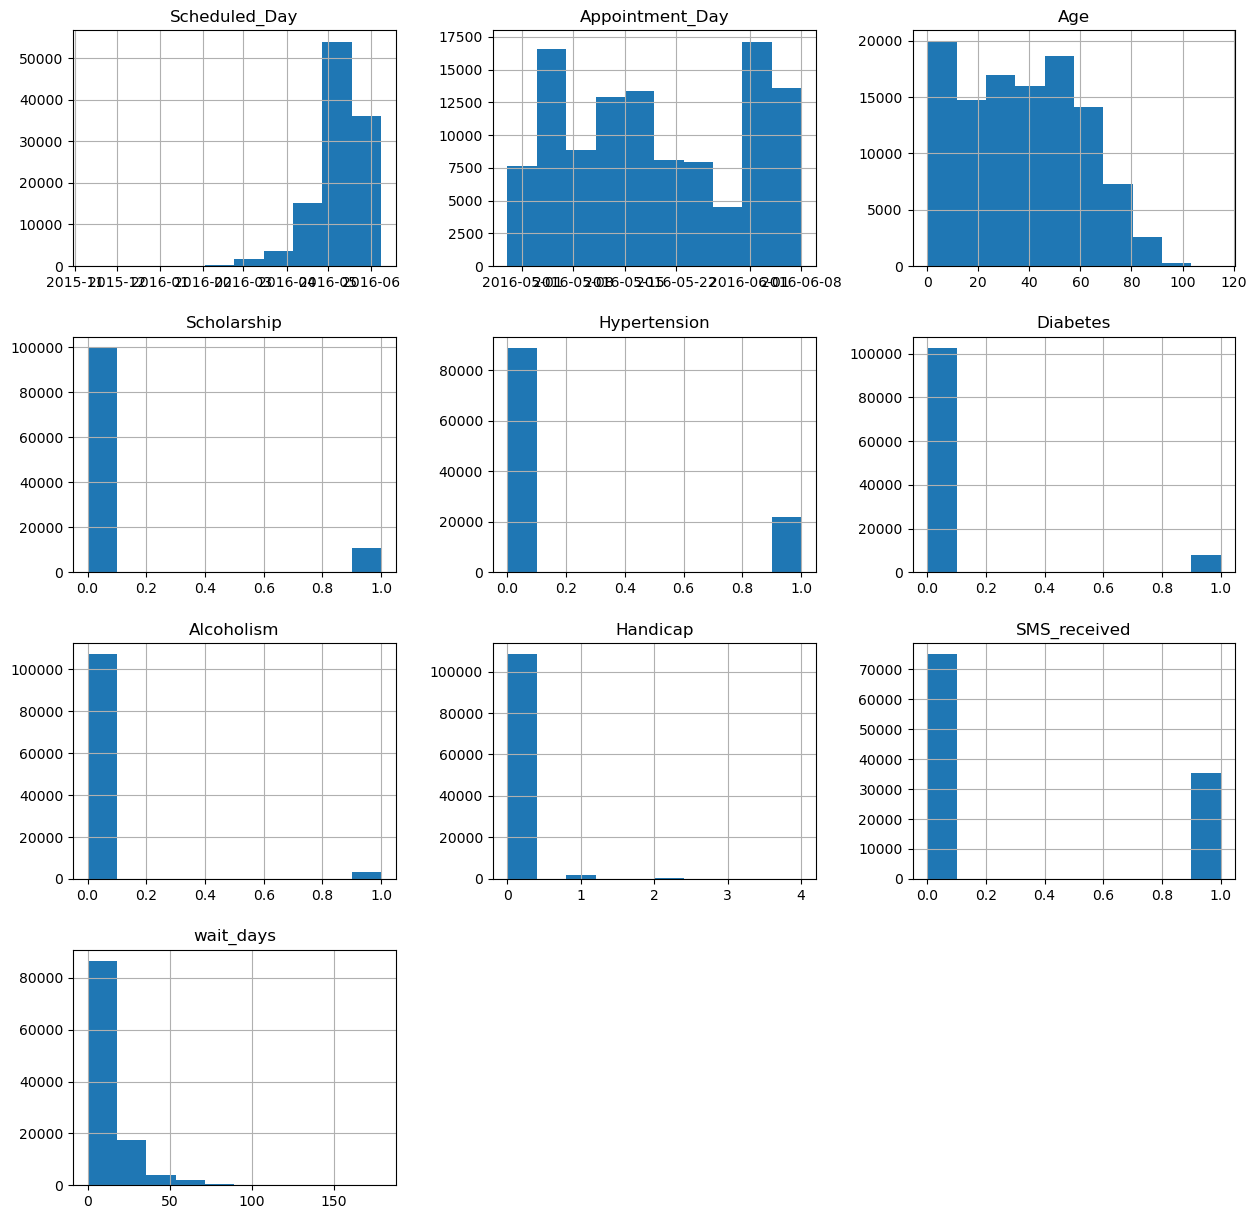

In [28]:
# First, let's look at a histogram of the whole dataframe.

df.hist(figsize=(15,15));

Questions will be analyzed by percentages as they are more accurate

---
---
>###  Q1.  What is the percentage of No-show for appointments?

present    88207
absent     22314
Name: No_show, dtype: int64
Proportion of No_shows: 79.81%
Proportion of Shows: 20.19%


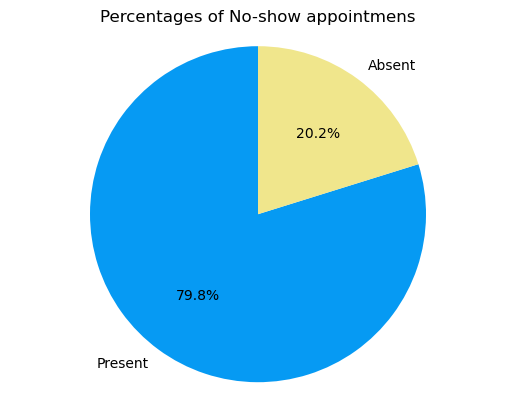

In [29]:
# Display the value counts of the No-show variable
print(df['No_show'].value_counts())

# Calculate the proportion of No-shows and Shows
no_show_prop = sum(df['No_show'] == "present")/df.shape[0]
show_prop = sum(df['No_show'] == "absent")/df.shape[0]
print("Proportion of No_shows: {:.2f}%".format(no_show_prop*100))
print("Proportion of Shows: {:.2f}%".format(show_prop*100))

# Create a pie chart to visualize the distribution of No-shows
labels = ['Present', 'Absent']
sizes = [no_show_prop, show_prop]
colors = ['#069AF3', '#F0E68C']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Percentages of No-show appointmens")
plt.savefig('No-show_pie.png', dpi=300)
plt.show()


Absenteeism rate is around 20% and Attendance rate is about 80%

---
---
>### Q2.  Is there a relationship between a person's age level and the percentage of No-show from appointments?

In [30]:
# calculate the percentage of show ups for a certain age level
child_No_show_percent = len( df[(df['Age_level'] == 'child') & (df['No_show'] == 'present')] )*100/len(df.query('Age_level == "child"'))
youth_No_show_percent = len( df[(df['Age_level'] == 'youth') & (df['No_show'] == 'present')] )*100/len(df.query('Age_level == "youth"'))
adult_No_show_percent = len( df[(df['Age_level'] == 'adult') & (df['No_show'] == 'present')] )*100/len(df.query('Age_level == "adult"'))
senior_No_show_percent = len( df[(df['Age_level'] == 'senior') & (df['No_show'] == 'present')] )*100/len(df.query('Age_level == "senior"'))

In [32]:
# define function for creating a pie plot for each age level
def pie_plot(percent, title):
    data = [percent, 100 - percent]
    plt.pie(data, labels = ["Present","Absent"], autopct='%1.2f%%', explode = (0,0.1), shadow=True, textprops = {"fontsize":15})
    plt.title("Percentage of {} patients who Present and who Absent".format(title))

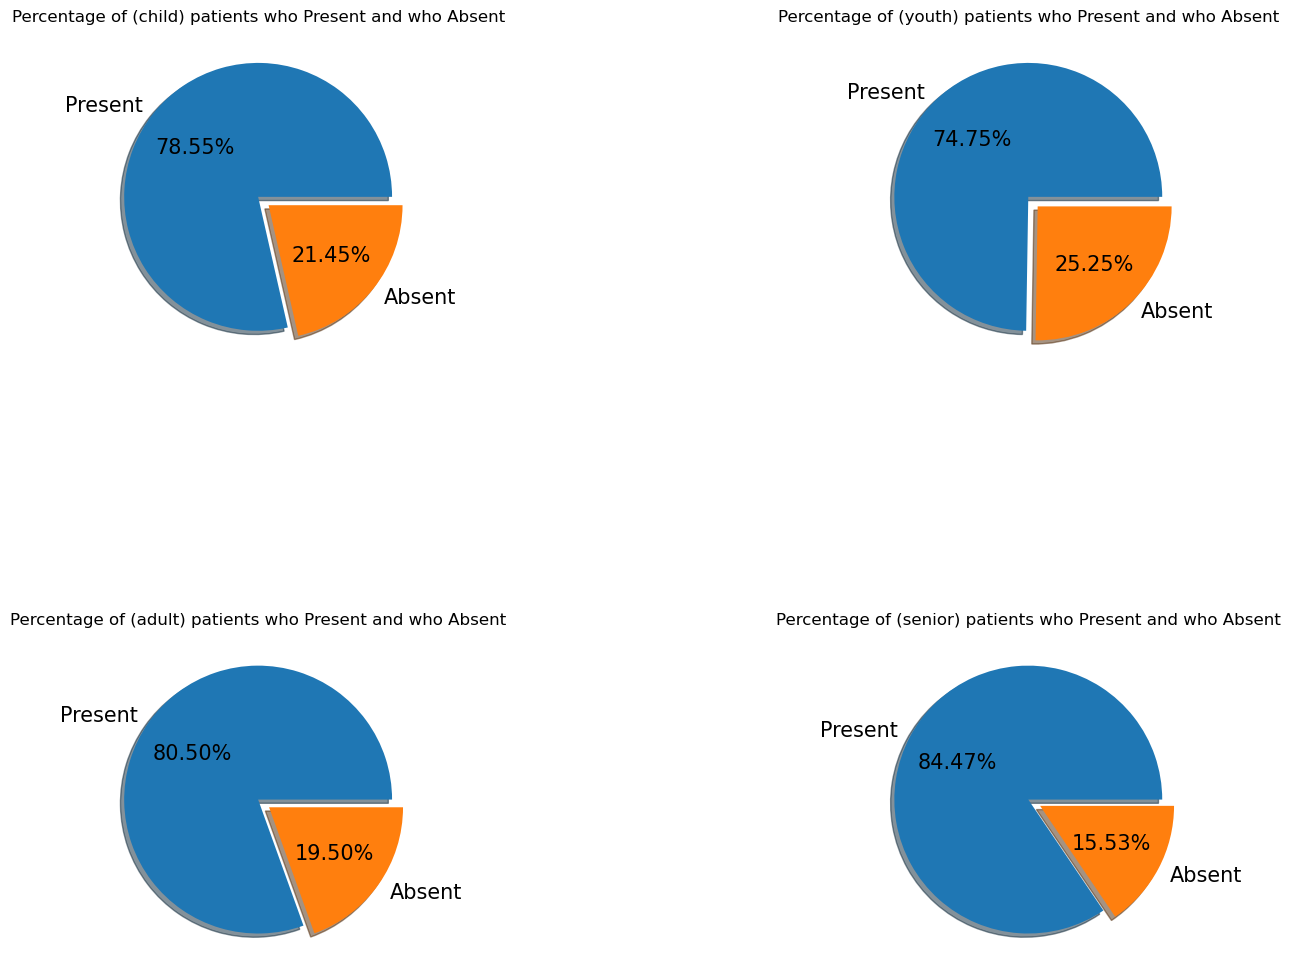

In [33]:
# making subplots
plt.subplots(2,2,figsize=(13,13))
plt.subplot(2,2,1)
pie_plot(child_No_show_percent, "(child)")
plt.subplot(2,2,2)
pie_plot(youth_No_show_percent, "(youth)")
plt.subplot(2,2,3)
pie_plot(adult_No_show_percent, "(adult)")
plt.subplot(2,2,4)
pie_plot(senior_No_show_percent, "(senior)")
  
# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1.3, 
                    hspace=0.2)
plt.show()

Young people are the most group absent from appointment, and the old people are the least.

---
---
>## Q3.  Did SMS messages reduce the percentage of No-show from appointments?

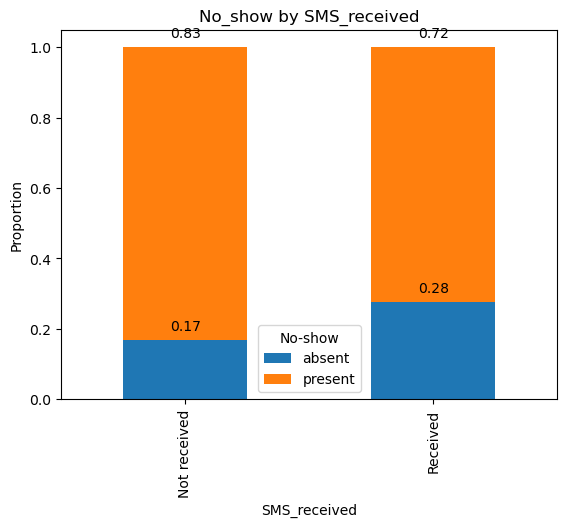

In [34]:
# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['SMS_received'], columns=df['No_show'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Not received', 'Received'])
ax.set_xlabel('SMS_received')
ax.set_ylabel('Proportion')
ax.set_title('No_show by SMS_received')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='No-show')
plt.grid(False)
plt.show()

People who received SMS meessages were absent more than people who did not received SMS messages.

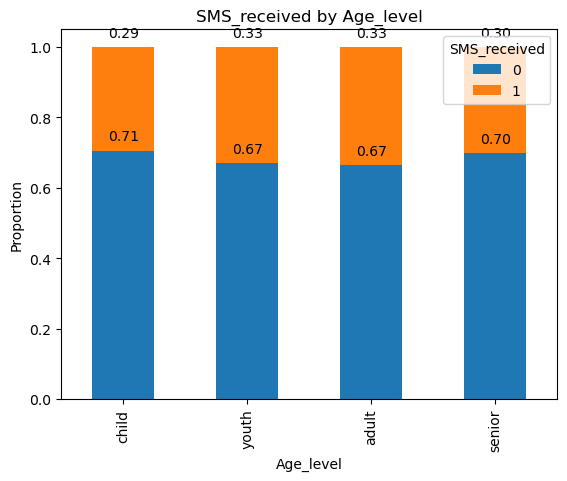

In [35]:
# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['Age_level'], columns=df['SMS_received'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['child','youth','adult','senior'])
ax.set_xlabel('Age_level')
ax.set_ylabel('Proportion')
ax.set_title('SMS_received by Age_level')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='SMS_received')
plt.grid(False)
plt.show()

This chart to see if the Age_levels which received SMS messages have effect on No-show appointments.

---
---
>## Q4. Are people with these diseases more disciplined in attending appointments?
>+ Hypertension
>+ Diabetes
>+ Diabetes
>+ Alcoholism

---
#### Hypertension

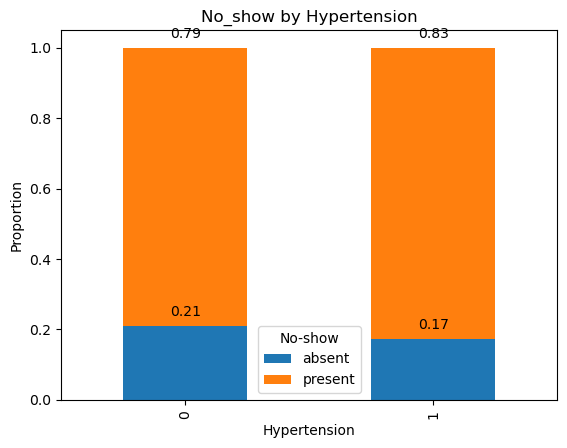

In [36]:
# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['Hypertension'], columns=df['No_show'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('Hypertension')
ax.set_ylabel('Proportion')
ax.set_title('No_show by Hypertension')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='No-show')
plt.grid(False)
plt.show()

No-show rate for people who have Hypertension is 17% , and the No-show rate for people who did not have Hypertension is 21%

---
#### Diabetes

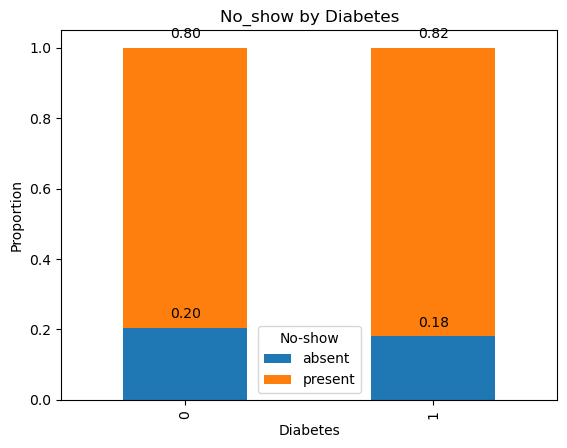

In [37]:
# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['Diabetes'], columns=df['No_show'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('Diabetes')
ax.set_ylabel('Proportion')
ax.set_title('No_show by Diabetes')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='No-show')
plt.grid(False)
plt.show()

No-show rate for people who have Diabetes is 18% , and the No-show rate for people who did not have Diabetes is 20%

---
#### Alcoholism

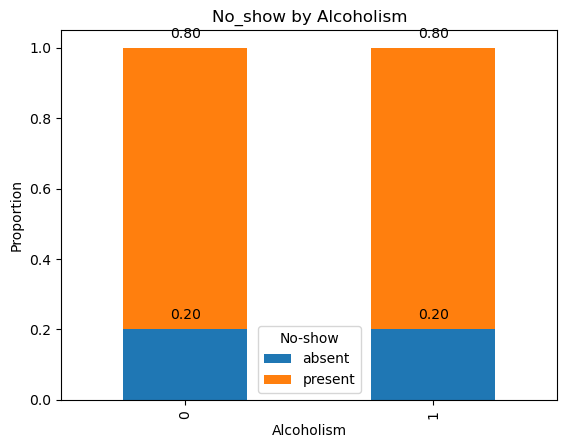

In [38]:
# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['Alcoholism'], columns=df['No_show'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['0', '1'])
ax.set_xlabel('Alcoholism')
ax.set_ylabel('Proportion')
ax.set_title('No_show by Alcoholism')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='No-show')
plt.grid(False)
plt.show()

There is no relationship between Alcoholism and No-show

---
#### Handicap

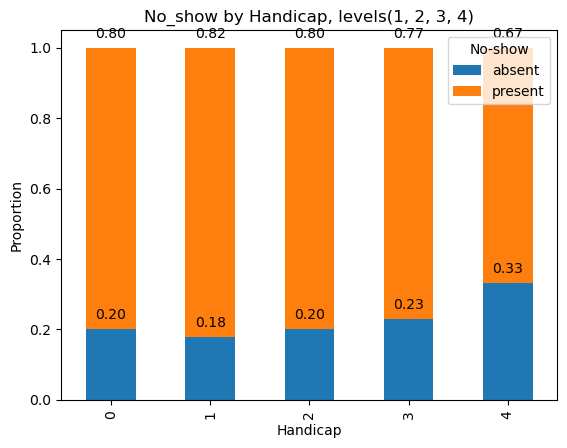

In [39]:
# Create a crosstab of No-show and SMS_received variables
cross_tab = pd.crosstab(index=df['Handicap'], columns=df['No_show'])

# Normalize the crosstab to get the proportions
cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Create the stacked bar chart with proportion labels
ax = cross_tab_prop.plot(kind='bar', stacked=True)
ax.set_xticklabels(['0', '1', '2', '3', '4'])
ax.set_xlabel('Handicap')
ax.set_ylabel('Proportion')
ax.set_title('No_show by Handicap, levels(1, 2, 3, 4)')

# Add proportion labels to the chart
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5, labels=[f'{x:.2f}' for x in i.datavalues])

plt.legend(loc='best', title='No-show')
plt.grid(False)
plt.show()

+ The No-show rate for people who have Handicamp (level 4) is the highest: (33%) 
+ The No-show rate for people who have Handicamp (level 1) is the lowest: (18%) 

---
---
---
---
---
---
---
---
---
---

<a id='conclusions'></a>
## Conclusions


> **Q1.** The percentage of people who attended appointments is around 80% , and The percentage of people who no-show from appointments is about 20%. The no-show rate is considered high for hospital appointments.


> **Q2.** The highest rate of age level for people who No-show appointments is youth people (**25.2%**), and the lowest rate is senior level(**15.5%**). Old people are more disciplined than young people to attend hospital appointments.

> **Q3.** 
>+ The chart (_No_show by SMS_received_) shows that people who received SMS messages were No-show around 28% , compared to people who did not received SMS messages who were No-show by 17%. _It was the opposite of my expect._ 
>+ I created another chart (_SMS_received by Age_level_) for this Question to see if the age levels have any effect to people who received SMS messages, I created this chart because it was the result of the analysis of the second question _Q2_ is (Young people are the most group absent from appointment, and the old people are the least). It occurred to me that some old people did not have mobile phones to received SMS messages, but the chart (_SMS_received by Age_level_) showed very small differences between age levels and people who received SMS messages.
>+ We conclude from this chart  (_SMS_received by Age_level_) that age_levels did not affect the percentage of people who received SMS messages and who No-show appointmens. 

> **Q4.** 
>+ **Hypertension** : No-show rate for people who have Hypertension is 17% , and the No-show rate for people who did not have Hypertension is 21%. That is mean the people who had Hypertension were more disciplined to attending the appointments
>+ **Diabetes** : No-show rate for people who have Diabetes is 18% , and the No-show rate for people who did not have Diabetes is 20%. The difference is small
>+ **Alcoholism** : There is no relationship between Alcoholism and No-show
>+ **Handicap** : The No-show rate for people who have Handicamp (level 4) is the highest: (33%), and The No-show rate for people who have Handicamp (level 1) is the lowest: (18%). The higher the Handicap level, the greater the No-show appointments rate.